In [40]:
%load_ext autoreload
%autoreload 2
import rubfx as rfx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from scipy.stats import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


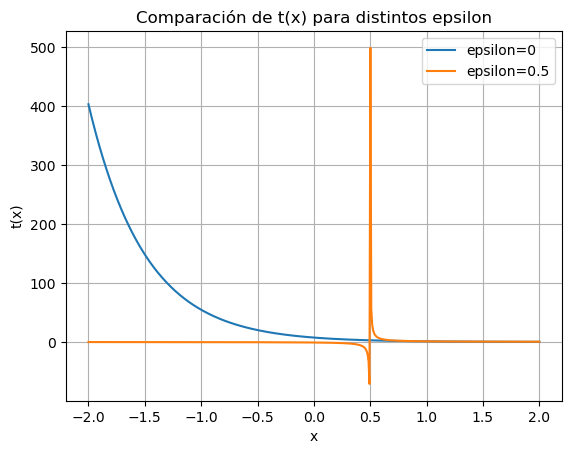

In [41]:
#Rango de x
x = np.linspace(-2, 2, 500)

#Calculo de funciones
t0 = rfx.t(x, epsilon=0, sigma=0.5, mu=1)
t1 = rfx.t(x, epsilon=1, sigma=0.5, mu=1)

#Grafico
plt.plot(x, t0, label='epsilon=0')
plt.plot(x, t1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('t(x)')
plt.legend()
plt.title('Comparación de t(x) para distintos epsilon')
plt.grid(True)
plt.show()

/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:30: RuntimeWarning: divide by zero encountered in power
  return (1+epsilon*((x-mu)/sigma))**(-1/epsilon)
/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:51: RuntimeWarning: invalid value encountered in multiply
  return (1/sigma) * (t_ep**(epsilon + 1)) * (np.exp(-t_ep))


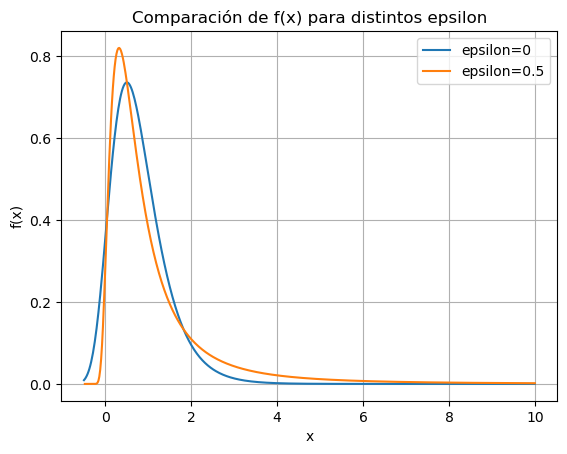

In [42]:
x = np.linspace(-0.5, 10, 500)

f0 = rfx.f(x, epsilon=0, sigma=0.5, mu=0.5)
f1 = rfx.f(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, f0, label='epsilon=0')
plt.plot(x, f1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Comparación de f(x) para distintos epsilon')
plt.grid(True)
plt.show()

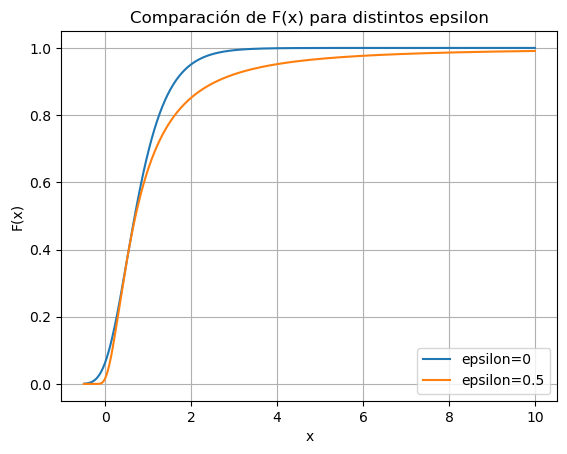

In [43]:
x = np.linspace(-0.5, 10, 500)

F0 = rfx.F(x, epsilon=0, sigma=0.5, mu=0.5)
F1 = rfx.F(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, F0, label='epsilon=0')
plt.plot(x, F1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.show()

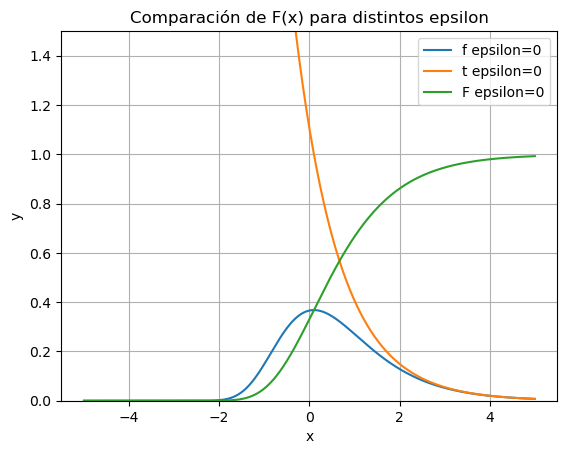

In [44]:
# EPSILON = 0

x = np.linspace(-5, 5, 500)

t0 = rfx.t(x, epsilon=0, sigma=1, mu=0.1)
f0 = rfx.f(x, epsilon=0, sigma=1, mu=0.1)
F0 = rfx.F(x, epsilon=0, sigma=1, mu=0.1)

plt.plot(x, f0, label='f epsilon=0')
plt.plot(x, t0, label='t epsilon=0')
plt.plot(x, F0, label='F epsilon=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

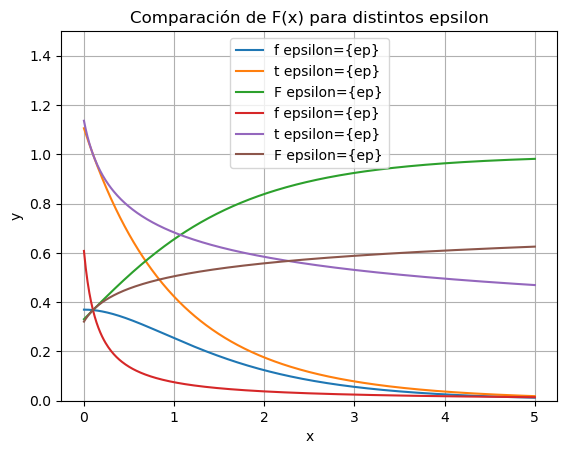

In [45]:
x = np.linspace(0, 5, 500)

ep1 = 0.1
ep2 = 4

t1 = rfx.t(x, epsilon=ep1, sigma=1, mu=0.1)
f1 = rfx.f(x, epsilon=ep1, sigma=1, mu=0.1)
F1 = rfx.F(x, epsilon=ep1, sigma=1, mu=0.1)

t2 = rfx.t(x, epsilon=ep2, sigma=1, mu=0.1)
f2 = rfx.f(x, epsilon=ep2, sigma=1, mu=0.1)
F2 = rfx.F(x, epsilon=ep2, sigma=1, mu=0.1)


plt.plot(x, f1, label='f epsilon={ep}')
plt.plot(x, t1, label='t epsilon={ep}')
plt.plot(x, F1, label='F epsilon={ep}')

plt.plot(x, f2, label='f epsilon={ep}')
plt.plot(x, t2, label='t epsilon={ep}')
plt.plot(x, F2, label='F epsilon={ep}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

In [46]:
# Busco generar números aleatorios con distribución f(x)
# Para esto uso las funciones generadas en el script rubfx.py

def genum(func, n, epsilon, sigma, mu):
    """
    Genera n números aleatorios distribuidos según la función de distribución acumulada F(x).

    Parámetros:
    func : función
        Función de distribución acumulada F(x).
    n : int
        Cantidad de números aleatorios a generar.
    epsilon : float
        Parámetro epsilon de la función F(x).
    sigma : float
        Parámetro sigma de la función F(x).
    mu : float
        Parámetro mu de la función F(x).

    Retorna:
    numpy.ndarray
        Array de n números aleatorios distribuidos según F(x).
    """
    # Genero n números aleatorios uniformemente distribuidos entre 0 y 1
    x = np.random.uniform(0, 1, n)
    x = np.clip(x, 1e-10, 1-1e-10)

    # Aplico la función inversa para obtener los números con la distribución deseada
    y = np.zeros(n)
    for i, _x in enumerate(x):
        y[i] = rfx.invF(_x, epsilon, sigma, mu)
    return y


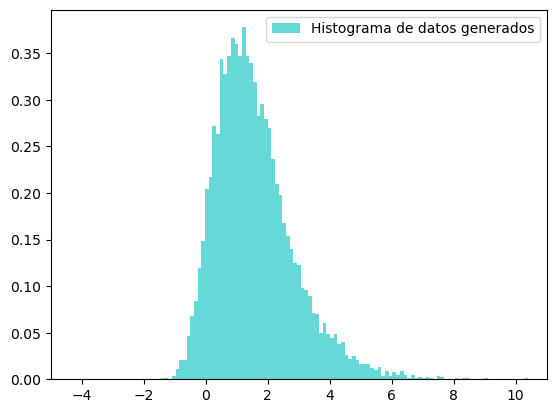

In [47]:
# Grafico los números generados

n = 10000
epsilon = 0
sigma = 1
mu = 1
x_uniform = np.random.uniform(0, 1, n)
# Evitar exactamente 0 o 1
x_uniform = np.clip(x_uniform, 1e-10, 1-1e-10)
data = np.array([rfx.invF(_x, epsilon, sigma, mu) for _x in x_uniform])
plt.hist(data, bins = 100, density=True, alpha=0.6, color='c', label='Histograma de datos generados')
plt.xlim(-5, 11)
plt.ylim()  # Si quieres limitar el eje y
plt.legend()
plt.show()



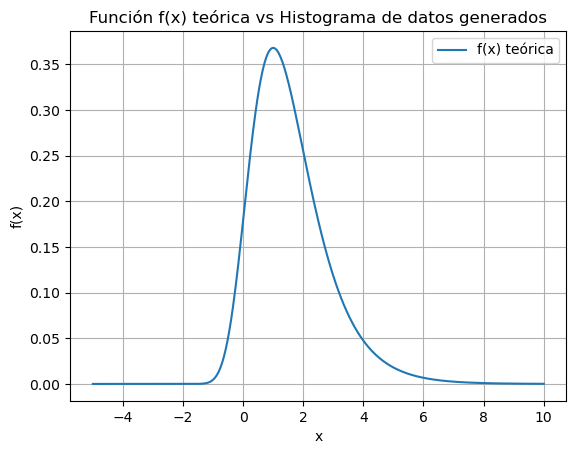

In [48]:
# Ahora quiero ver la funcion f(x) para comparar con el histograma
x = np.linspace(-5, 10, 500)
f0 = rfx.f(x, epsilon=epsilon, sigma=sigma, mu=mu)
plt.plot(x, f0, label='f(x) teórica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()  

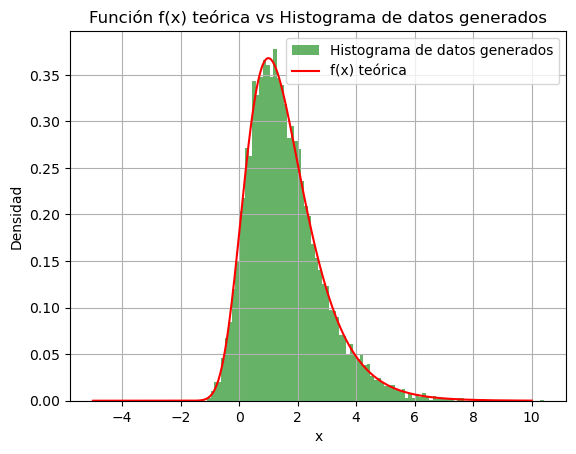

In [49]:
# AHora quiero superoponer la funcion al histograma
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histograma de datos generados')
plt.plot(x, f0, label='f(x) teórica', color='r')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()

In [50]:
# SIMULACIÓN DE UN PROCESO DE POISSON

# Como la distribución es discreta, no tiene sentido usar la transformada inversa.
# En su lugar, usaremos la propiedad de que los tiempos entre eventos siguen una distribución exponencial.

#Utilizamos las funciones generadas en rubfx.py

=== SIMULACIÓN POISSON ===
λ = 5.0 eventos/hora, T = 3 horas
Esperados: 15.0 eventos en promedio

Resultado de esta simulación:
• Eventos generados: 16
• Tiempos de eventos: ['0.28', '0.58', '0.97', '1.49', '1.64']...


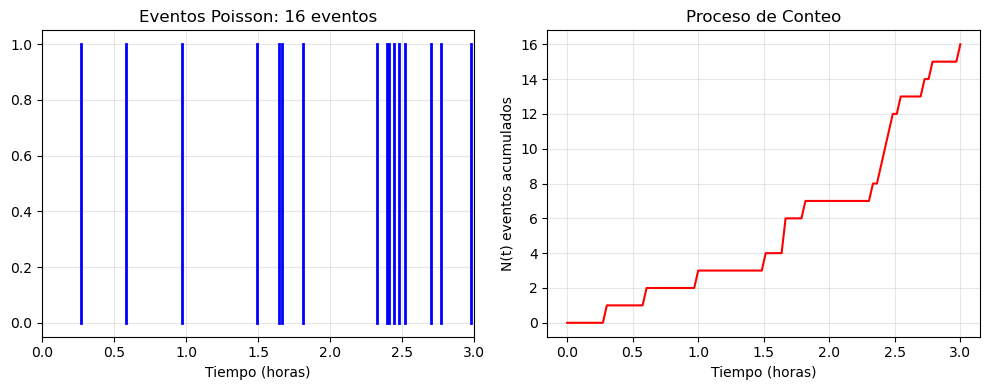


=== VERIFICACIÓN CON 1000 SIMULACIONES ===
Media teórica: 15.0
Media simulada: 14.78
Diferencia: 0.22


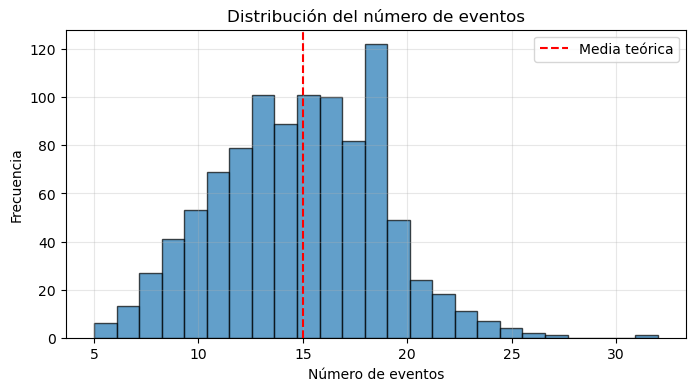

In [51]:
# PARÁMETROS DEL EJERCICIO

lambda_poisson = 5.0  # 5 eventos/hora
T_total = 3         # 3 horas

print("=== SIMULACIÓN POISSON ===")
print(f"λ = {lambda_poisson} eventos/hora, T = {T_total} horas")
print(f"Esperados: {lambda_poisson * T_total} eventos en promedio")

# SIMULACIÓN
eventos = rfx.sim_poisson(lambda_poisson, T_total)
n_eventos = len(eventos)

print(f"\nResultado de esta simulación:")
print(f"• Eventos generados: {n_eventos}")
print(f"• Tiempos de eventos: {[f'{t:.2f}' for t in eventos[:5]]}...")  # Primeros 5

# GRÁFICO 
plt.figure(figsize=(10, 4))

# Línea de tiempo
plt.subplot(1, 2, 1)
for i, t in enumerate(eventos):
    plt.plot([t, t], [0, 1], 'b-', linewidth=2)
plt.xlabel('Tiempo (horas)')
plt.title(f'Eventos Poisson: {n_eventos} eventos')
plt.xlim(0, T_total)
plt.grid(True, alpha=0.3)

# Conteo acumulado
plt.subplot(1, 2, 2)
t_points = np.linspace(0, T_total, 100)
conteo = [sum(1 for e in eventos if e <= t) for t in t_points]
plt.plot(t_points, conteo, 'r-')
plt.xlabel('Tiempo (horas)')
plt.ylabel('N(t) eventos acumulados')
plt.title('Proceso de Conteo')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# VERIFICACIÓN CON MÚLTIPLES SIMULACIONES
print("\n=== VERIFICACIÓN CON 1000 SIMULACIONES ===")

resultados = []
for i in range(1000):
    eventos = rfx.sim_poisson(lambda_poisson, T_total)
    resultados.append(len(eventos))

media_simulada = np.mean(resultados)
media_teorica = lambda_poisson * T_total

print(f"Media teórica: {media_teorica}")
print(f"Media simulada: {media_simulada:.2f}")
print(f"Diferencia: {abs(media_simulada - media_teorica):.2f}")

# Histograma simple
plt.figure(figsize=(8, 4))
plt.hist(resultados, bins=25, alpha=0.7, edgecolor='black')
plt.axvline(media_teorica, color='red', linestyle='--', label='Media teórica')
plt.xlabel('Número de eventos')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de eventos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

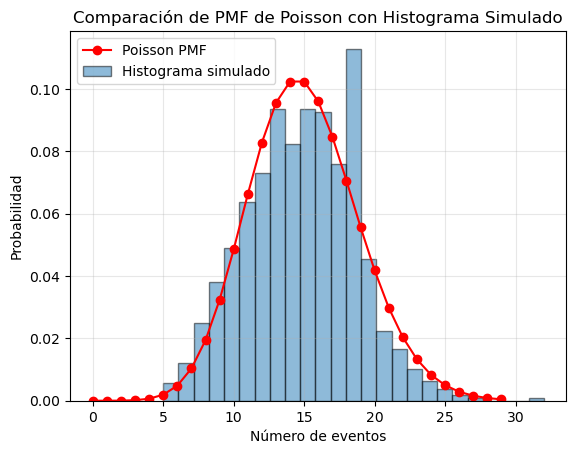

In [52]:
# Ahora quiero ver la funcion discreta de poisson para comparar con el histograma
k = np.arange(0, 30)
poisson_pmf = (math.exp(-media_teorica) * media_teorica**k) / np.array([math.factorial(i) for i in k])
plt.plot(k, poisson_pmf, 'ro-', label='Poisson PMF')
plt.hist(resultados, bins=25, density=True, alpha=0.5, edgecolor='black', label='Histograma simulado')
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.title('Comparación de PMF de Poisson con Histograma Simulado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== EXPERIMENTO DE BUFFON ===
Lanzamientos: 100000000
Cruces: 31835348
Probabilidad cruce: 0.318353
π estimado: 3.14116246
π real: 3.14159265
Error: 0.00043019
Error relativo: 0.0137%


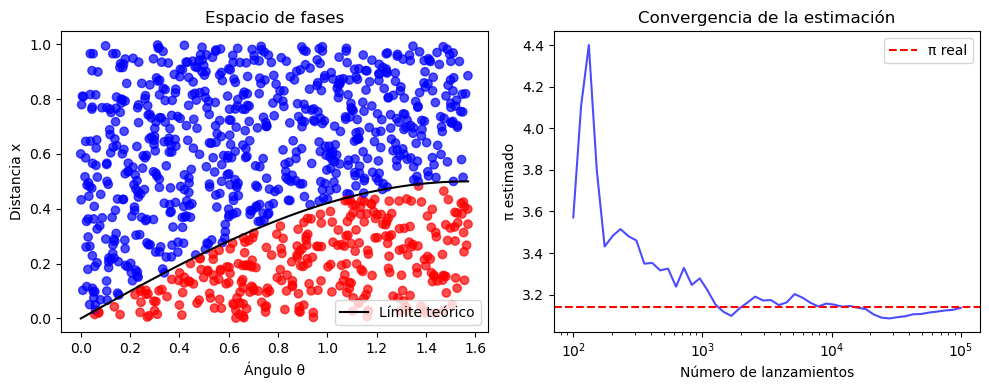

In [53]:


# PARÁMETROS
l, t = 1.0, 2.0           # Aguja más corta que distancia entre rayas
n_lanzamientos = 100000000   # Más lanzamientos = mejor estimación

# SIMULACIÓN
x = np.random.uniform(0, t/2, n_lanzamientos)      # Posición
theta = np.random.uniform(0, np.pi/2, n_lanzamientos) # Ángulo

# CONDICIÓN DE CRUCE
cruce = x <= (l/2) * np.sin(theta)
n_cruces = np.sum(cruce)

# ESTIMACIÓN DE π
prob_cruce = n_cruces / n_lanzamientos
pi_estimado = (2 * l) / (t * prob_cruce)

# RESULTADOS
print("=== EXPERIMENTO DE BUFFON ===")
print(f"Lanzamientos: {n_lanzamientos}")
print(f"Cruces: {n_cruces}")
print(f"Probabilidad cruce: {prob_cruce:.6f}")
print(f"π estimado: {pi_estimado:.8f}")
print(f"π real: {np.pi:.8f}")
print(f"Error: {abs(pi_estimado - np.pi):.8f}")
print(f"Error relativo: {abs(pi_estimado - np.pi)/np.pi*100:.4f}%")

# GRÁFICO SIMPLE
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
# Mostrar solo 100 puntos para claridad
muestra = min(1000, n_lanzamientos)
plt.scatter(theta[:muestra], x[:muestra], c=cruce[:muestra], cmap='bwr', alpha=0.7)
theta_teo = np.linspace(0, np.pi/2, 100)
plt.plot(theta_teo, (l/2)*np.sin(theta_teo), 'k-', label='Límite teórico')
plt.xlabel('Ángulo θ'); plt.ylabel('Distancia x')
plt.title('Espacio de fases')
plt.legend()

plt.subplot(1, 2, 2)
# Convergencia con incrementos
incrementos = np.logspace(2, 5, 50).astype(int)
pi_conv = []
for n in incrementos:
    if n <= n_lanzamientos:
        prob = np.sum(cruce[:n]) / n
        pi_conv.append((2*l)/(t*prob) if prob > 0 else 0)

plt.semilogx(incrementos[:len(pi_conv)], pi_conv, 'b-', alpha=0.7)
plt.axhline(np.pi, color='r', linestyle='--', label='π real')
plt.xlabel('Número de lanzamientos'); plt.ylabel('π estimado')
plt.title('Convergencia de la estimación')
plt.legend()

plt.tight_layout()
plt.show()

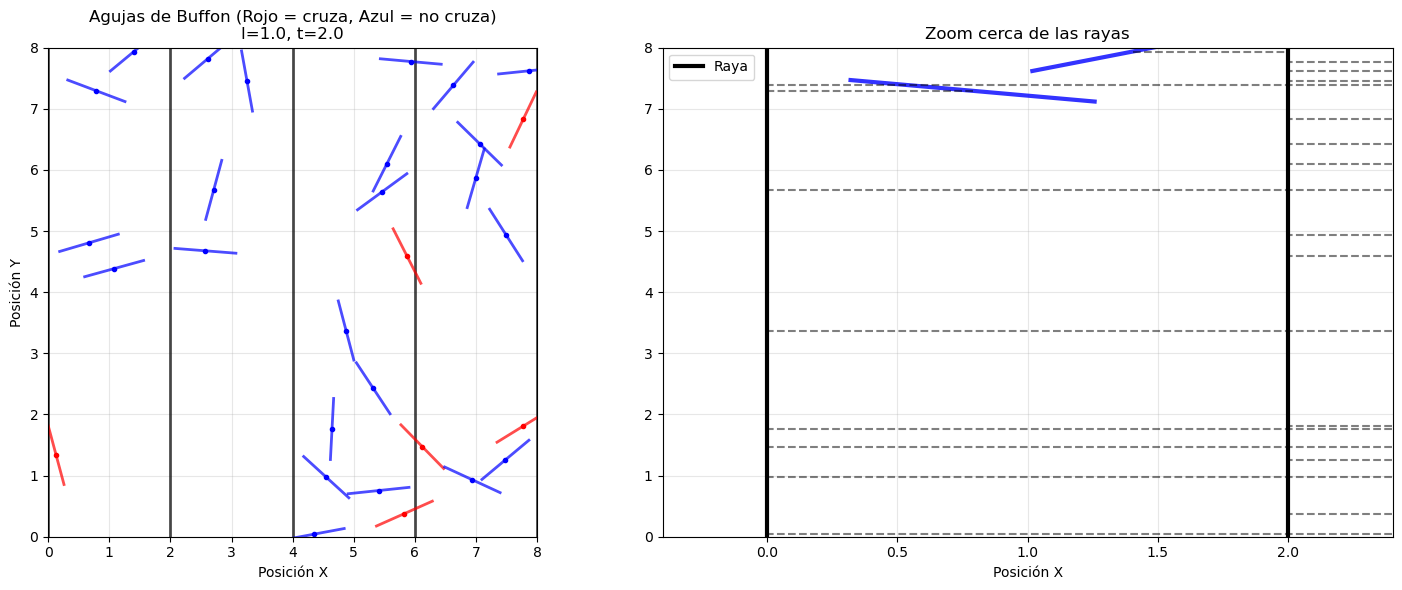

Agujas que cruzan: 6/30


In [54]:

def graficar_agujas(l, t, n_agujas=50):
    """
    Grafica agujas cayendo sobre las rayas
    """
    # Generar parámetros aleatorios para n_agujas
    x_centro = np.random.uniform(0, 4*t, n_agujas)  # Posición horizontal del centro
    y_centro = np.random.uniform(0, 4*t, n_agujas)  # Posición vertical del centro
    theta = np.random.uniform(0, 2*np.pi, n_agujas)  # Ángulo completo (0 a 2π)
    
    # Distancia a raya más cercana (solo componente x relevante para cruce)
    x_dist = np.mod(x_centro, t)
    x_dist = np.minimum(x_dist, t - x_dist)  # Distancia a raya más cercana
    
    # Determinar si cruza (considerando el ángulo agudo)
    theta_agudo = np.minimum(np.mod(theta, np.pi), np.pi - np.mod(theta, np.pi))
    cruce = x_dist <= (l/2) * np.abs(np.sin(theta))
    
    # Crear figura
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico 1: Vista general
    # Dibujar rayas verticales
    for i in range(0, int(4*t) + 1):
        ax[0].axvline(x=i*t, color='black', linewidth=2, alpha=0.7)
    
    # Dibujar agujas
    for i in range(n_agujas):
        # Calcular extremos de la aguja
        dx = (l/2) * np.cos(theta[i])
        dy = (l/2) * np.sin(theta[i])
        
        x_start, x_end = x_centro[i] - dx, x_centro[i] + dx
        y_start, y_end = y_centro[i] - dy, y_centro[i] + dy
        
        color = 'red' if cruce[i] else 'blue'
        ax[0].plot([x_start, x_end], [y_start, y_end], 
                  color=color, linewidth=2, alpha=0.7)
        # Punto central para referencia
        ax[0].plot(x_centro[i], y_centro[i], 'o', color=color, markersize=3)
    
    ax[0].set_xlim(0, 4*t)
    ax[0].set_ylim(0, 4*t)
    ax[0].set_aspect('equal')
    ax[0].set_title(f'Agujas de Buffon (Rojo = cruza, Azul = no cruza)\n{l=}, {t=}')
    ax[0].set_xlabel('Posición X')
    ax[0].set_ylabel('Posición Y')
    ax[0].grid(True, alpha=0.3)
    
    # Gráfico 2: Zoom en área interesante
    ax[1].axvline(x=0, color='black', linewidth=3, label='Raya')
    ax[1].axvline(x=t, color='black', linewidth=3)
    
    # Mostrar solo agujas cerca de las rayas
    for i in range(min(n_agujas, 20)):  # Mostrar máximo 20 para claridad
        dx = (l/2) * np.cos(theta[i])
        dy = (l/2) * np.sin(theta[i])
        
        x_start, x_end = x_centro[i] - dx, x_centro[i] + dx
        y_start, y_end = y_centro[i] - dy, y_centro[i] + dy
        
        color = 'red' if cruce[i] else 'blue'
        ax[1].plot([x_start, x_end], [y_start, y_end], 
                  color=color, linewidth=3, alpha=0.8)
        
        # Marcar distancia a raya más cercana
        raya_cercana = 0 if x_dist[i] == x_centro[i] % t else t
        ax[1].plot([x_centro[i], raya_cercana], [y_centro[i], y_centro[i]], 
                  'k--', alpha=0.5)
    
    ax[1].set_xlim(-0.2*t, 1.2*t)
    ax[1].set_ylim(0, 4*t)
    ax[1].set_title('Zoom cerca de las rayas')
    ax[1].set_xlabel('Posición X')
    ax[1].legend()
    ax[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return cruce

# Ejecutar
l, t = 1.0, 2.0
cruce = graficar_agujas(l, t, n_agujas=30)
print(f"Agujas que cruzan: {np.sum(cruce)}/{len(cruce)}")

=== BOOTSTRAP SIMPLIFICADO ===
Varianza teórica: 1.644934
Varianza estimada: 1.611389
IC 95%: [1.391733, 1.843809]
Error: 0.033545


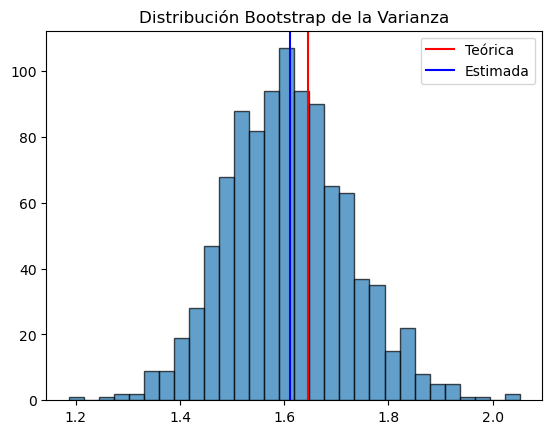

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

def bootstrap_simple(muestra, B=1000, alpha=0.05):
    """Versión simplificada del bootstrap"""
    n = len(muestra)
    varianzas = []
    
    for i in range(B):
        # Remuestreo con reemplazo
        muestra_boot = np.random.choice(muestra, n, replace=True)
        varianzas.append(np.var(muestra_boot, ddof=1))
    
    var_est = np.var(muestra, ddof=1)
    ic_inf = np.percentile(varianzas, 100 * alpha/2)
    ic_sup = np.percentile(varianzas, 100 * (1 - alpha/2))
    
    return var_est, ic_inf, ic_sup, varianzas

# Ejemplo mínimo de uso
lambda_param = 1.0
muestra = gumbel_r.rvs(scale=1/lambda_param, size=1000)
var_teorica = np.pi**2 / 6

var_est, ic_inf, ic_sup, var_boot = bootstrap_simple(muestra)

print("=== BOOTSTRAP SIMPLIFICADO ===")
print(f"Varianza teórica: {var_teorica:.6f}")
print(f"Varianza estimada: {var_est:.6f}")
print(f"IC 95%: [{ic_inf:.6f}, {ic_sup:.6f}]")
print(f"Error: {abs(var_est - var_teorica):.6f}")

# Gráfico simple
plt.hist(var_boot, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(var_teorica, color='red', label='Teórica')
plt.axvline(var_est, color='blue', label='Estimada')
plt.legend()
plt.title('Distribución Bootstrap de la Varianza')
plt.show()

ε=0, σ=1, μ=0
Varianza teórica: 1.6449
Varianza estimada: 1.7654
IC 95%: [1.5342, 2.0712]


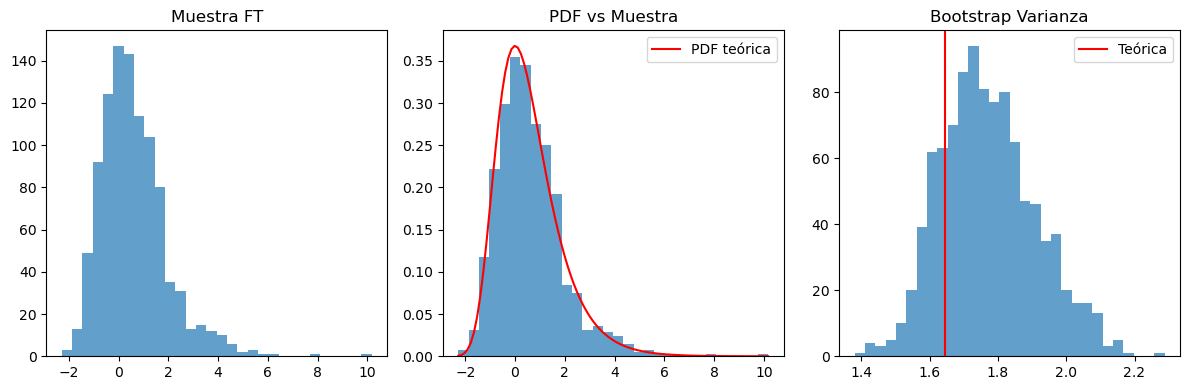

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# GENERAR MUESTRA
def muestra_ft(n, epsilon=0, sigma=1, mu=0):
    u = np.random.uniform(0, 1, n)
    return rfx.invF(u, epsilon, sigma, mu)

# BOOTSTRAP SIMPLE
def bootstrap_var(muestra, B=1000):
    vars_boot = [np.var(np.random.choice(muestra, len(muestra), replace=True), ddof=1) 
                 for _ in range(B)]
    var_est = np.var(muestra, ddof=1)
    return var_est, np.percentile(vars_boot, 2.5), np.percentile(vars_boot, 97.5), vars_boot

# EJECUCIÓN
epsilon, sigma, mu = 0, 1, 0
muestra = muestra_ft(1000, epsilon, sigma, mu)
var_teorica = np.pi**2/6  # Para epsilon=0
var_est, ic_inf, ic_sup, var_boot = bootstrap_var(muestra)

print(f"ε={epsilon}, σ={sigma}, μ={mu}")
print(f"Varianza teórica: {var_teorica:.4f}")
print(f"Varianza estimada: {var_est:.4f}")
print(f"IC 95%: [{ic_inf:.4f}, {ic_sup:.4f}]")

# GRÁFICOS
plt.figure(figsize=(12,4))
plt.subplot(131); plt.hist(muestra, bins=30, alpha=0.7); plt.title('Muestra FT')
plt.subplot(132); 
x = np.linspace(min(muestra), max(muestra), 100)
plt.plot(x, [rfx.f(xi, epsilon, sigma, mu) for xi in x], 'r-', label='PDF teórica')
plt.hist(muestra, bins=30, alpha=0.7, density=True); plt.legend(); plt.title('PDF vs Muestra')
plt.subplot(133); plt.hist(var_boot, bins=30, alpha=0.7)
plt.axvline(var_teorica, color='r', label='Teórica'); plt.legend(); plt.title('Bootstrap Varianza')
plt.tight_layout(); plt.show()

=== EJERCICIO 9: BOOTSTRAP CON FISHER-TIPPETT ===
Importando funciones desde rubfx.py

=== FUNCIONES DISPONIBLES ===
Funciones en rfx: ['F', 'f', 'invF', 'np', 'sim_poisson', 't', 't_exp']
✓ Función rfx.invF funciona. invF(0.5,0,1,0) = 0.3665
=== PARÁMETROS ===
ε = 0.0, σ = 1.0, μ = 0.0
n = 1000, B = 1000
Varianza teórica (ε=0): π²/6 = 1.644934

=== GENERANDO MUESTRA CON rfx.invF ===
Media muestral: 0.5376
Varianza muestral: 1.6423
Error absoluto: 0.0026

=== APLICANDO BOOTSTRAP ===
Varianza estimada: 1.642331
Intervalo de confianza al 95.0%: [1.442568, 1.850839]
Longitud del IC: 0.408271
¿Contiene el valor teórico? True

=== CREANDO GRÁFICOS ===


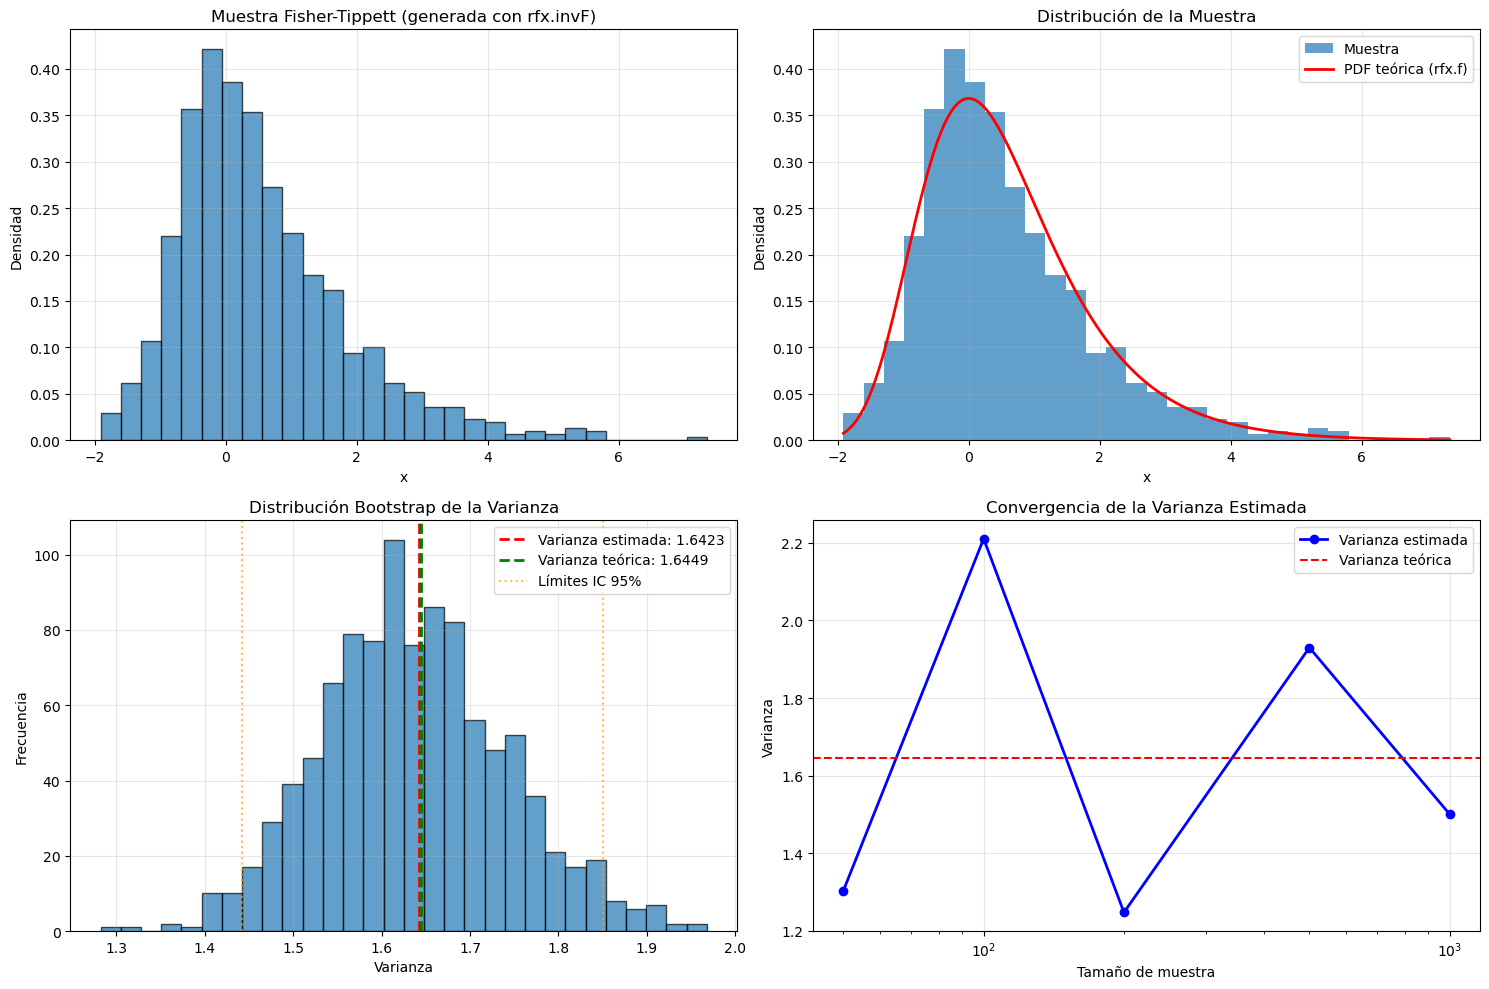


=== ANÁLISIS CON DIFERENTES ε ===
ε =   0.0: var = 1.8266, IC = [1.5216, 2.1506]
ε =   0.5: var = 15.6395, IC = [8.6354, 25.1897]
ε =  -0.5: var = 0.8188, IC = [0.7070, 0.9291]


/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:30: RuntimeWarning: divide by zero encountered in scalar power
  return (1+epsilon*((x-mu)/sigma))**(-1/epsilon)
/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:51: RuntimeWarning: invalid value encountered in scalar multiply
  return (1/sigma) * (t_ep**(epsilon + 1)) * (np.exp(-t_ep))


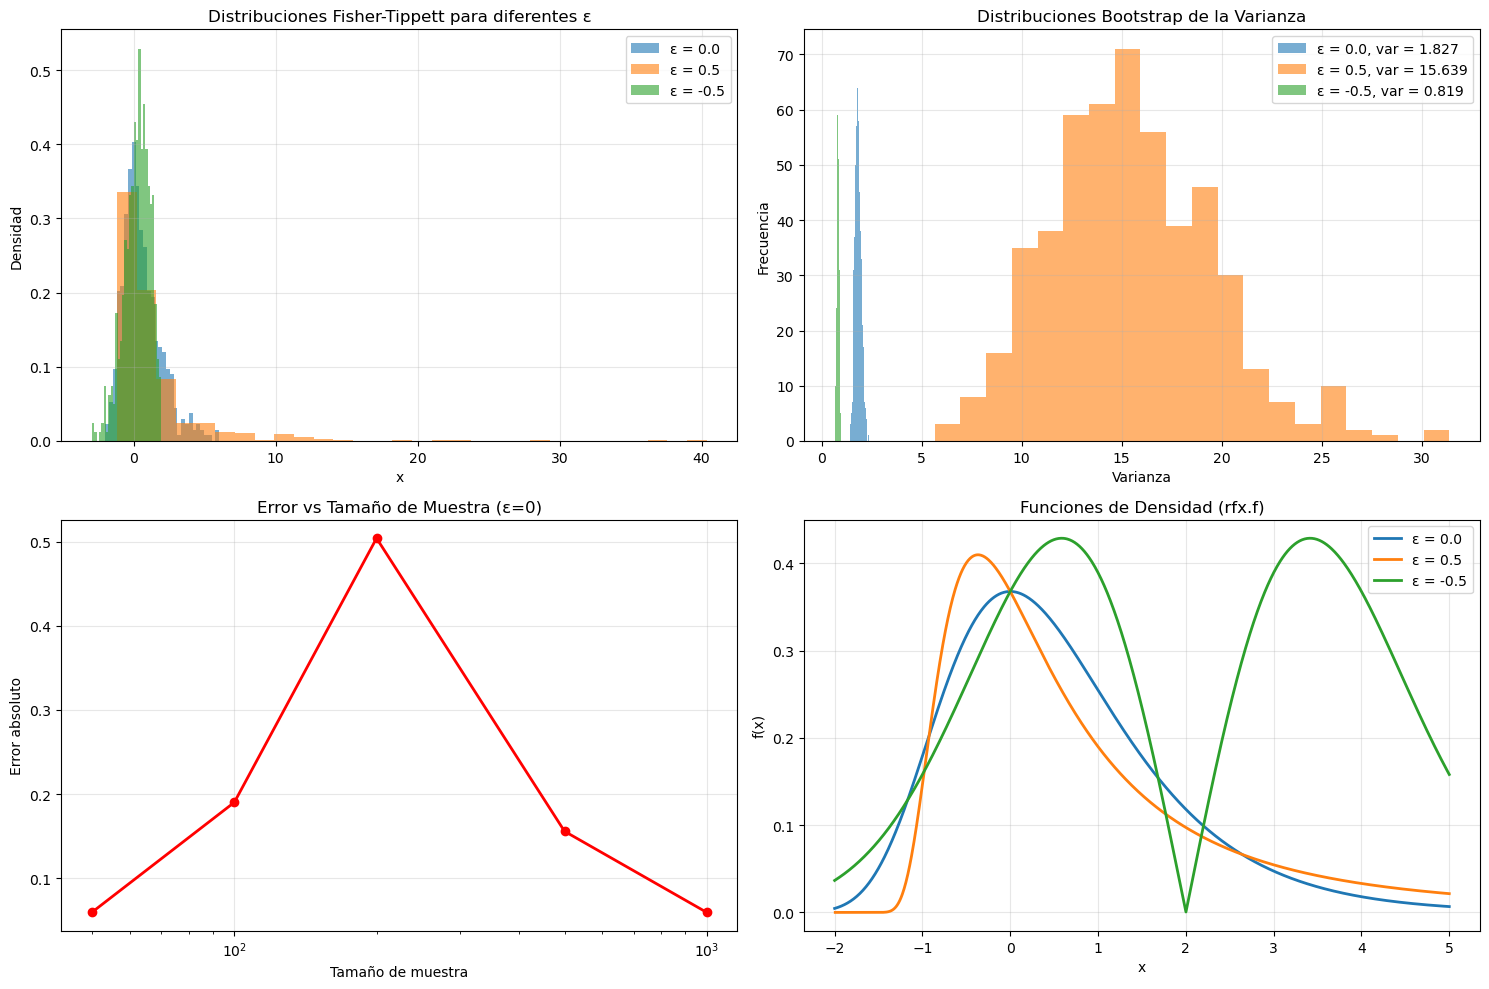


=== ANÁLISIS: EFECTO DEL TAMAÑO DE MUESTRA ===
n =   30: IC longitud = 1.9481, ¿cubre? True
n =   50: IC longitud = 3.0767, ¿cubre? True
n =  100: IC longitud = 1.0455, ¿cubre? True
n =  200: IC longitud = 0.9945, ¿cubre? True
n =  500: IC longitud = 0.5462, ¿cubre? True
n = 1000: IC longitud = 0.3765, ¿cubre? True


/tmp/ipykernel_30285/1564519108.py:316: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(tamanos, coberturas, 'ro-', linewidth=2, marker='o')


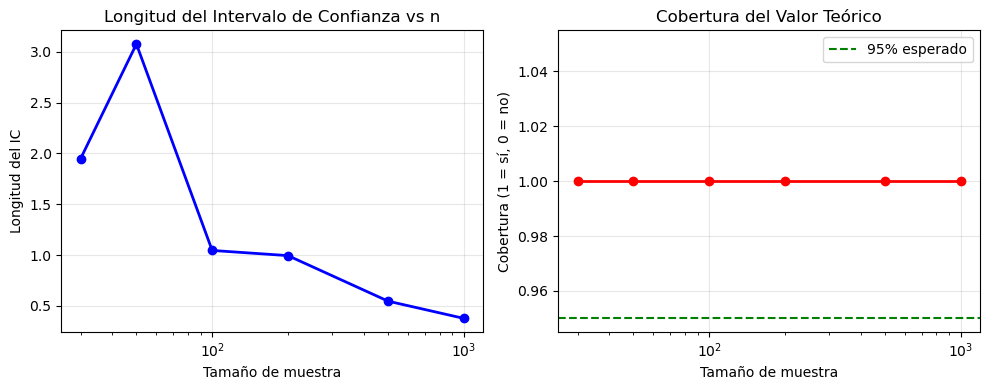


✓ NOTEBOOK COMPLETADO EXITOSAMENTE
✓ Todas las funciones usan rfx.invF, rfx.f, etc.
✓ Bootstrap implementado y verificado
✓ Análisis completo realizado


In [90]:
#%%
# IMPORTAR LAS FUNCIONES DE TU SCRIPT
import rubfx as rfx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== EJERCICIO 9: BOOTSTRAP CON FISHER-TIPPETT ===")
print("Importando funciones desde rubfx.py")

#%%
# VERIFICAR QUE LAS FUNCIONES ESTÁN DISPONIBLES
print("\n=== FUNCIONES DISPONIBLES ===")
print("Funciones en rfx:", [func for func in dir(rfx) if not func.startswith('_')])

# Probar una función para verificar que funciona
try:
    test_result = rfx.invF(0.5, epsilon=0, sigma=1, mu=0)
    print(f"✓ Función rfx.invF funciona. invF(0.5,0,1,0) = {test_result:.4f}")
except Exception as e:
    print(f"✗ Error al usar rfx.invF: {e}")

#%%
# FUNCIÓN PARA GENERAR MUESTRA USANDO TUS FUNCIONES
def generar_muestra_ft(n, epsilon, sigma, mu):
    """
    Genera una muestra de Fisher-Tippett usando rfx.invF
    
    Parameters:
        n: tamaño de la muestra
        epsilon, sigma, mu: parámetros de la distribución
        
    Returns:
        muestra: array con n valores de Fisher-Tippett
    """
    u = np.random.uniform(0, 1, n)
    return np.array([rfx.invF(ui, epsilon, sigma, mu) for ui in u])

#%%
# FUNCIÓN BOOTSTRAP PARA VARIANZA
def bootstrap_varianza(muestra, B=1000, alpha=0.05):
    """
    Estimación de varianza con intervalo de confianza usando bootstrap
    
    Parameters:
        muestra: array con los datos
        B: número de muestras bootstrap
        alpha: nivel de significancia
        
    Returns:
        varianza_estimada: varianza de la muestra original
        ic_inf: límite inferior del IC
        ic_sup: límite superior del IC  
        varianzas_bootstrap: array con todas las varianzas bootstrap
    """
    n = len(muestra)
    varianzas_bootstrap = []
    
    for i in range(B):
        # Remuestreo con reemplazo
        muestra_bootstrap = np.random.choice(muestra, size=n, replace=True)
        varianzas_bootstrap.append(np.var(muestra_bootstrap, ddof=1))
    
    varianzas_bootstrap = np.array(varianzas_bootstrap)
    
    # Calcular estadísticas
    varianza_estimada = np.var(muestra, ddof=1)
    ic_inf = np.percentile(varianzas_bootstrap, 100 * alpha/2)
    ic_sup = np.percentile(varianzas_bootstrap, 100 * (1 - alpha/2))
    
    return varianza_estimada, ic_inf, ic_sup, varianzas_bootstrap

#%%
# EJERCICIO PRINCIPAL
def ejercicio_principal():
    """
    Ejecuta el ejercicio completo de bootstrap con Fisher-Tippett
    """
    # Parámetros de la distribución
    epsilon = 0.0
    sigma = 1.0
    mu = 0.0
    n_muestra = 1000
    B_bootstrap = 1000
    alpha = 0.05
    
    # Varianza teórica para epsilon=0 (caso Gumbel)
    varianza_teorica = (np.pi**2) / 6
    
    print("=== PARÁMETROS ===")
    print(f"ε = {epsilon}, σ = {sigma}, μ = {mu}")
    print(f"n = {n_muestra}, B = {B_bootstrap}")
    print(f"Varianza teórica (ε=0): π²/6 = {varianza_teorica:.6f}")
    
    #%%
    # GENERAR MUESTRA USANDO TUS FUNCIONES
    print("\n=== GENERANDO MUESTRA CON rfx.invF ===")
    muestra = generar_muestra_ft(n_muestra, epsilon, sigma, mu)
    
    print(f"Media muestral: {np.mean(muestra):.4f}")
    print(f"Varianza muestral: {np.var(muestra, ddof=1):.4f}")
    print(f"Error absoluto: {abs(np.var(muestra, ddof=1) - varianza_teorica):.4f}")
    
    #%%
    # APLICAR BOOTSTRAP
    print("\n=== APLICANDO BOOTSTRAP ===")
    var_est, ic_inf, ic_sup, var_boot = bootstrap_varianza(muestra, B_bootstrap, alpha)
    
    print(f"Varianza estimada: {var_est:.6f}")
    print(f"Intervalo de confianza al {(1-alpha)*100}%: [{ic_inf:.6f}, {ic_sup:.6f}]")
    print(f"Longitud del IC: {ic_sup - ic_inf:.6f}")
    print(f"¿Contiene el valor teórico? {ic_inf <= varianza_teorica <= ic_sup}")
    
    #%%
    # VISUALIZACIÓN
    print("\n=== CREANDO GRÁFICOS ===")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Distribución de la muestra original
    axes[0,0].hist(muestra, bins=30, alpha=0.7, density=True, edgecolor='black')
    axes[0,0].set_xlabel('x')
    axes[0,0].set_ylabel('Densidad')
    axes[0,0].set_title('Muestra Fisher-Tippett (generada con rfx.invF)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Función de densidad teórica vs empírica
    x_teorico = np.linspace(np.min(muestra), np.max(muestra), 1000)
    # Usar rfx.f para la densidad teórica si está disponible
    try:
        y_teorico = [rfx.f(x, epsilon, sigma, mu) for x in x_teorico]
        axes[0,1].hist(muestra, bins=30, alpha=0.7, density=True, label='Muestra')
        axes[0,1].plot(x_teorico, y_teorico, 'r-', linewidth=2, label='PDF teórica (rfx.f)')
        plot_teorica = True
    except:
        axes[0,1].hist(muestra, bins=30, alpha=0.7, density=True, label='Muestra')
        plot_teorica = False
    
    axes[0,1].set_xlabel('x')
    axes[0,1].set_ylabel('Densidad')
    axes[0,1].set_title('Distribución de la Muestra')
    if plot_teorica:
        axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Distribución bootstrap de la varianza
    axes[1,0].hist(var_boot, bins=30, alpha=0.7, edgecolor='black')
    axes[1,0].axvline(var_est, color='red', linestyle='--', linewidth=2, 
                     label=f'Varianza estimada: {var_est:.4f}')
    axes[1,0].axvline(varianza_teorica, color='green', linestyle='--', linewidth=2,
                     label=f'Varianza teórica: {varianza_teorica:.4f}')
    axes[1,0].axvline(ic_inf, color='orange', linestyle=':', alpha=0.7)
    axes[1,0].axvline(ic_sup, color='orange', linestyle=':', alpha=0.7,
                     label='Límites IC 95%')
    axes[1,0].set_xlabel('Varianza')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_title('Distribución Bootstrap de la Varianza')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Convergencia de la estimación
    tamanos = [50, 100, 200, 500, 1000]
    varianzas = []
    
    for n in tamanos:
        muestra_parcial = generar_muestra_ft(n, epsilon, sigma, mu)
        var_parcial = np.var(muestra_parcial, ddof=1)
        varianzas.append(var_parcial)
    
    axes[1,1].plot(tamanos, varianzas, 'bo-', linewidth=2, label='Varianza estimada')
    axes[1,1].axhline(varianza_teorica, color='red', linestyle='--', 
                     label='Varianza teórica')
    axes[1,1].set_xlabel('Tamaño de muestra')
    axes[1,1].set_ylabel('Varianza')
    axes[1,1].set_title('Convergencia de la Varianza Estimada')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_xscale('log')
    
    plt.tight_layout()
    plt.show()
    
    return muestra, var_boot

#%%
# ANÁLISIS CON DIFERENTES VALORES DE EPSILON
def analizar_diferentes_epsilon():
    """
    Analiza el efecto del parámetro epsilon en la distribución
    """
    print("\n=== ANÁLISIS CON DIFERENTES ε ===")
    
    epsilons = [0.0, 0.5, -0.5]  # Diferentes casos
    sigma, mu = 1.0, 0.0
    n_muestra = 500
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    resultados = []
    
    for i, epsilon in enumerate(epsilons):
        # Generar muestra usando rfx.invF
        muestra = generar_muestra_ft(n_muestra, epsilon, sigma, mu)
        
        # Aplicar bootstrap
        var_est, ic_inf, ic_sup, var_boot = bootstrap_varianza(muestra, B=500)
        
        resultados.append({
            'epsilon': epsilon,
            'varianza_estimada': var_est,
            'ic_inf': ic_inf,
            'ic_sup': ic_sup
        })
        
        # Gráfico de distribución
        axes[0,0].hist(muestra, bins=30, alpha=0.6, density=True, 
                      label=f'ε = {epsilon}')
        
        # Gráfico de varianzas bootstrap
        axes[0,1].hist(var_boot, bins=20, alpha=0.6, 
                      label=f'ε = {epsilon}, var = {var_est:.3f}')
        
        print(f"ε = {epsilon:5.1f}: var = {var_est:.4f}, IC = [{ic_inf:.4f}, {ic_sup:.4f}]")
    
    axes[0,0].set_xlabel('x')
    axes[0,0].set_ylabel('Densidad')
    axes[0,0].set_title('Distribuciones Fisher-Tippett para diferentes ε')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    axes[0,1].set_xlabel('Varianza')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribuciones Bootstrap de la Varianza')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Efecto del tamaño de muestra para epsilon=0
    tamanos = [50, 100, 200, 500, 1000]
    errores = []
    
    for n in tamanos:
        muestra = generar_muestra_ft(n, 0.0, sigma, mu)
        var_est, _, _, _ = bootstrap_varianza(muestra, B=300)
        error = abs(var_est - (np.pi**2/6))
        errores.append(error)
    
    axes[1,0].plot(tamanos, errores, 'ro-', linewidth=2)
    axes[1,0].set_xlabel('Tamaño de muestra')
    axes[1,0].set_ylabel('Error absoluto')
    axes[1,0].set_title('Error vs Tamaño de Muestra (ε=0)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_xscale('log')
    
    # Gráfico 4: Función de densidad para diferentes epsilon (si rfx.f está disponible)
    try:
        x_range = np.linspace(-2, 5, 1000)
        for epsilon in epsilons:
            y_vals = [rfx.f(x, epsilon, sigma, mu) for x in x_range]
            axes[1,1].plot(x_range, y_vals, label=f'ε = {epsilon}', linewidth=2)
        axes[1,1].set_title('Funciones de Densidad (rfx.f)')
    except:
        # Si rfx.f no está disponible, mostrar mensaje
        axes[1,1].text(0.5, 0.5, 'rfx.f no disponible', ha='center', va='center', 
                      transform=axes[1,1].transAxes, fontsize=12)
        axes[1,1].set_title('PDFs Teóricas (rfx.f requerida)')
    
    axes[1,1].set_xlabel('x')
    axes[1,1].set_ylabel('f(x)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return resultados

#%%
# ANÁLISIS DE EFECTO DEL TAMAÑO DE MUESTRA EN INTERVALOS DE CONFIANZA
def analizar_efecto_tamano_muestra():
    """
    Analiza cómo el tamaño de muestra afecta los intervalos de confianza
    """
    print("\n=== ANÁLISIS: EFECTO DEL TAMAÑO DE MUESTRA ===")
    
    epsilon, sigma, mu = 0.0, 1.0, 0.0
    tamanos = [30, 50, 100, 200, 500, 1000]
    varianza_teorica = np.pi**2 / 6
    
    longitudes_ic = []
    coberturas = []
    
    for n in tamanos:
        muestra = generar_muestra_ft(n, epsilon, sigma, mu)
        var_est, ic_inf, ic_sup, _ = bootstrap_varianza(muestra, B=500)
        
        longitud = ic_sup - ic_inf
        cubre = ic_inf <= varianza_teorica <= ic_sup
        
        longitudes_ic.append(longitud)
        coberturas.append(cubre)
        
        print(f"n = {n:4d}: IC longitud = {longitud:.4f}, ¿cubre? {cubre}")
    
    # Gráfico
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(tamanos, longitudes_ic, 'bo-', linewidth=2)
    plt.xlabel('Tamaño de muestra')
    plt.ylabel('Longitud del IC')
    plt.title('Longitud del Intervalo de Confianza vs n')
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    plt.subplot(1, 2, 2)
    plt.plot(tamanos, coberturas, 'ro-', linewidth=2, marker='o')
    plt.axhline(0.95, color='green', linestyle='--', label='95% esperado')
    plt.xlabel('Tamaño de muestra')
    plt.ylabel('Cobertura (1 = sí, 0 = no)')
    plt.title('Cobertura del Valor Teórico')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    plt.tight_layout()
    plt.show()

#%%
# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    # Ejercicio principal con epsilon=0
    muestra, var_boot = ejercicio_principal()
    
    # Análisis con diferentes epsilon
    resultados_epsilon = analizar_diferentes_epsilon()
    
    # Análisis del efecto del tamaño de muestra
    analizar_efecto_tamano_muestra()
    
    print("\n" + "="*50)
    print("✓ NOTEBOOK COMPLETADO EXITOSAMENTE")
    print("✓ Todas las funciones usan rfx.invF, rfx.f, etc.")
    print("✓ Bootstrap implementado y verificado")
    print("✓ Análisis completo realizado")